# Data Visualization - Learning From Disaster : Titanic

#### Description  : This is homework for data visualization training at Telkomsel Data Science Academy 
* Prepared by : Edo Belva F

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.shape

(891, 12)

In [10]:
#mencari kolom yang kosong
df.isnull().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Mari kita lihat data kita dalam bentuk grafik

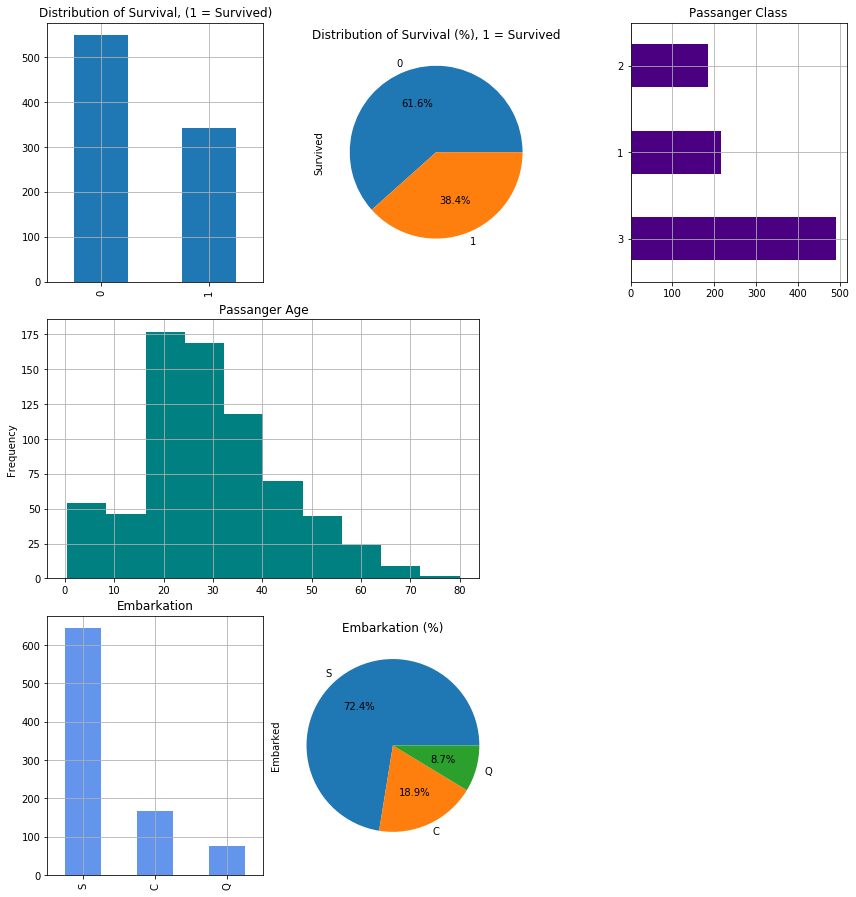

In [45]:
plt.axes([0.05, 2.07, 0.5, 0.9])
df.Survived.value_counts().plot.bar()
plt.title("Distribution of Survival, (1 = Survived)")
plt.grid(True)

plt.axes([0.7, 2.07, 0.5, 0.9])
df.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Survival (%), 1 = Survived")

plt.axes([1.4, 2.07, 0.5, 0.9])
df.Pclass.value_counts().plot.barh(color = 'indigo')
plt.title("Passanger Class")
plt.grid(True)

plt.axes([0.05, 1.04, 1, 0.9])
df.Age.plot.hist(bins=10, color = 'teal')
plt.title("Passanger Age")
plt.grid(True)

plt.axes([0.05, .01, 0.5, 0.9])
df.Embarked.value_counts().plot.bar(color = 'cornflowerblue')
plt.title("Embarkation")
plt.grid(True)

plt.axes([0.6, .01, 0.5, 0.9])
df.Embarked.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Embarkation (%)")
plt.grid(True)



Based on the chart, we can draw several conclution, such as :
<br>1. the survival rate is only 38.4%
<br>2. Most passanger are in the third class
<br>3. Most passanger age are between 20-30 years old
<br>4. There are 3 city where passanger embarked from, S, C and Q. And most passanger embarked from S (72.4%)

#### Who Survived? Lets explore deeper!

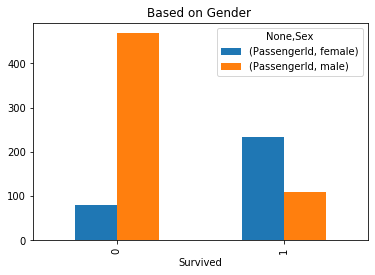

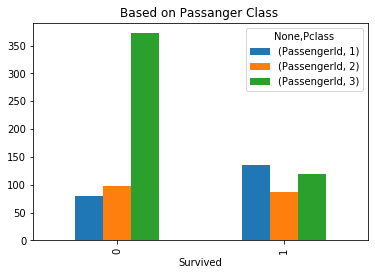

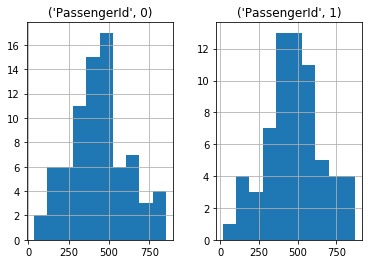

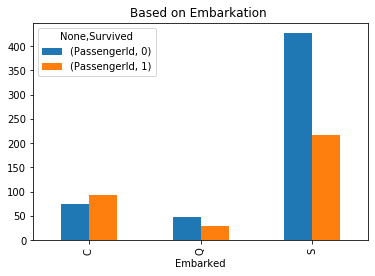

In [40]:
Explore1 = ['Sex', 'Survived', 'PassengerId'] 
df_slice = df[Explore1]
slice_pivot = df_slice.pivot_table(index='Survived', columns='Sex',aggfunc=np.size, fill_value=0)

Explore2 = ['Pclass', 'Survived', 'PassengerId'] 
df_slice2 = df[Explore2]
slice_pivot2 = df_slice2.pivot_table(index='Survived', columns='Pclass',aggfunc=np.size, fill_value=0)

Explore3 = ['Age', 'Survived', 'PassengerId'] 
df_slice3 = df[Explore3]
slice_pivot3 = df_slice3.pivot_table(index='Age', columns='Survived')

Explore4 = ['Embarked', 'Survived', 'PassengerId'] 
df_slice4 = df[Explore4]
slice_pivot4 = df_slice4.pivot_table(index='Embarked', columns='Survived',aggfunc=np.size, fill_value=0)

#plt.subplot(132)
slice_pivot.plot.bar()
plt.title("Based on Gender "); 

slice_pivot2.plot.bar()
plt.title("Based on Passanger Class ");

slice_pivot3.hist()
#plt.title("Based on Passangers Age ");

slice_pivot4.plot.bar()
plt.title("Based on Embarkation ");

After exploring a little deeper above, we can conclude :
<br>1. Even though the number of male passenger is higher than the female, but surprisingly most of the survivor are women
<br>2. And despite having the lowest number, the most of the survivor are from the first class.
<br>3. There is no significant difference in age between the survivor and the victim
<br>4. Since most of passenger embarked from 'S', then most of survivor are embarked from there too. But the highest survival rate is from the passenger that embarked from 'C'

#### Lets explore more

#### 1. Survival based on Sex and Passanger Class

Text(0.5, 1.0, 'Male Class 3')

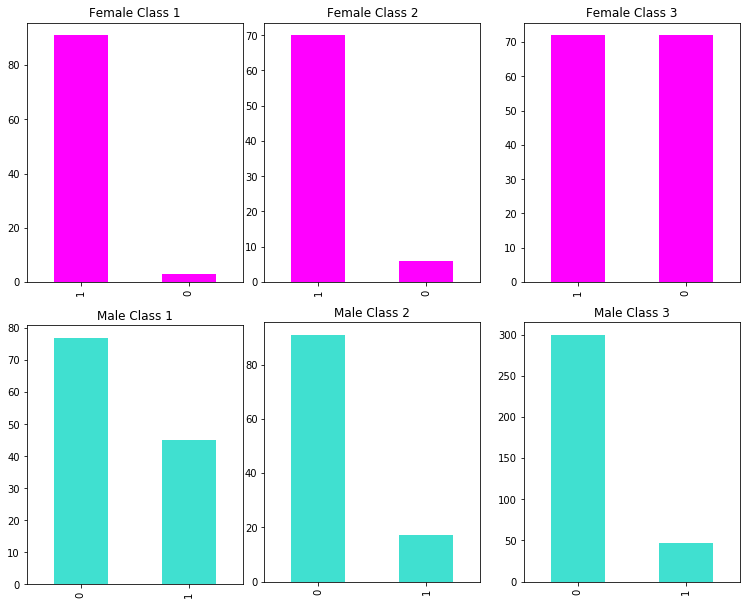

In [46]:
female_class1 = df.Survived[df.Sex == 'female'][df.Pclass == 1].value_counts()
female_class2 = df.Survived[df.Sex == 'female'][df.Pclass == 2].value_counts()
female_class3 = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()

plt.axes([0.05, 2.1, 0.5, 0.9])
female_class1.plot(kind='bar', label='female, class 1', color='magenta')
plt.title("Female Class 1")   

#plt.subplot(132)
plt.axes([0.6, 2.1, 0.5, 0.9])
female_class2.plot(kind='bar', label='female, class 2', color='magenta')
plt.title("Female Class 2")   

#plt.subplot(133)
plt.axes([1.2, 2.1, 0.5, 0.9])
female_class3.plot(kind='bar', label='female, class 3', color='magenta')
plt.title("Female Class 3")   

male_class1 = df.Survived[df.Sex == 'male'][df.Pclass == 1].value_counts()
male_class2 = df.Survived[df.Sex == 'male'][df.Pclass == 2].value_counts()
male_class3 = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()

plt.axes([0.05, 1.05, 0.5, 0.9])
male_class1.plot(kind='bar', label='male, class 1', color='turquoise')
plt.title("Male Class 1")   

#plt.subplot(132)
plt.axes([0.6, 1.06, 0.5, 0.9])
male_class2.plot(kind='bar', label='male, class 2', color='turquoise')
plt.title("Male Class 2")   

#plt.subplot(133)
plt.axes([1.2, 1.06, 0.5, 0.9])
male_class3.plot(kind='bar', label='male, class 3', color='turquoise')
plt.title("Male Class 3")   


From the graph above, we can see that :
<br>1. Women always have the higher survival rate, despite the class. Even in the third class where the survival rate is the lowest, Women survival rate is still higher than men survival rate in the first class.
<br>2. Both men and women, the survival rate in class 1 is always the highest, followed by the class 2 and the class 3 respectively

#### 2. Survival based on Sex and Embarkation

Text(0.5, 1.0, 'Male Embarked S')

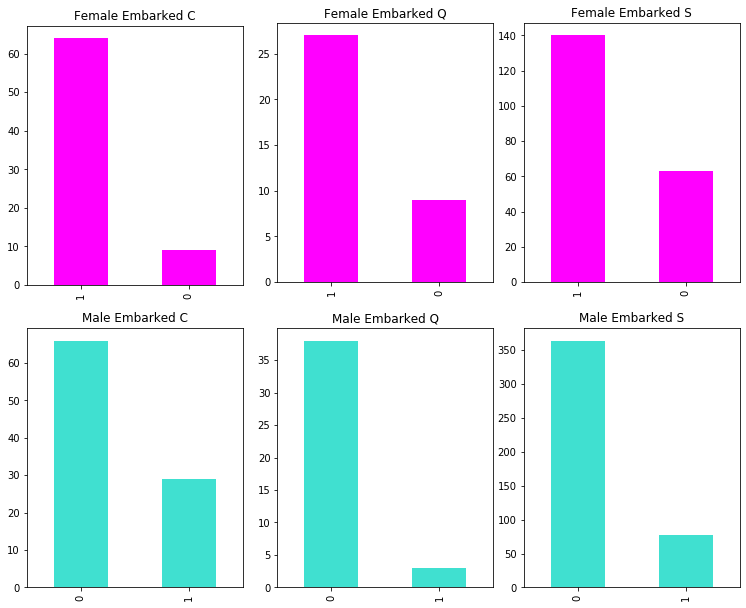

In [47]:
female_class1 = df.Survived[df.Sex == 'female'][df.Embarked == 'C'].value_counts()
female_class2 = df.Survived[df.Sex == 'female'][df.Embarked == 'Q'].value_counts()
female_class3 = df.Survived[df.Sex == 'female'][df.Embarked == 'S'].value_counts()

plt.axes([0.05, 2.05, 0.5, 0.9])
female_class1.plot(kind='bar', label='female, class 1', color='magenta')
plt.title("Female Embarked C")   

#plt.subplot(132)
plt.axes([0.63, 2.06, 0.5, 0.9])
female_class2.plot(kind='bar', label='female, class 2', color='magenta')
plt.title("Female Embarked Q")   

#plt.subplot(133)
plt.axes([1.2, 2.06, 0.5, 0.9])
female_class3.plot(kind='bar', label='female, class 3', color='magenta')
plt.title("Female Embarked S")   

male_class1 = df.Survived[df.Sex == 'male'][df.Embarked == 'C'].value_counts()
male_class2 = df.Survived[df.Sex == 'male'][df.Embarked == 'Q'].value_counts()
male_class3 = df.Survived[df.Sex == 'male'][df.Embarked == 'S'].value_counts()

plt.axes([0.05, 1, 0.5, 0.9])
male_class1.plot(kind='bar', label='male, class 1', color='turquoise')
plt.title("Male Embarked C")   

#plt.subplot(132)
plt.axes([0.63, 1, 0.5, 0.9])
male_class2.plot(kind='bar', label='male, class 2', color='turquoise')
plt.title("Male Embarked Q")   

#plt.subplot(133)
plt.axes([1.2, 1, 0.5, 0.9])
male_class3.plot(kind='bar', label='male, class 3', color='turquoise')
plt.title("Male Embarked S")   

Based on chart above, we can conclude :
<br>1. Both Men and Women that embarked from C has the highest survival rate compared to another embarkment point
<br>2. The Women that embarked form S has the lowest survival rate and Men that embarked from Q has the lowest survival rate

### Conclusion

#### Based on the evident that we gather above, hence, a passenger will have the high chance of survival in titanic incident if :

the passenger is woman, is a first class passenger, and embarked from 'C'